<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_8_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.8'

In [5]:
os.listdir(base_path)

['data_add_delta_2.8_n20.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.939511,61.262619,43.365078,48601.148261,48808.715469,11265.611743,37543.103726
1,0.0,1.0,21.710516,94.525180,31.383993,-6466.166755,-6308.547067,-12162.765880,5854.218813
2,0.0,2.0,99.906666,81.380687,45.343353,174007.797013,174244.427719,15037.541889,159206.885830
3,0.0,3.0,97.726620,35.032531,85.059607,37190.207607,37418.026365,11812.467119,25605.559246
4,0.0,4.0,99.265047,70.507157,53.134768,-106593.173536,-106360.266564,14216.537455,-120576.804020
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.043596,28.001912,23.922495,-11.591645,130.376358,-57409.958204,57540.334562
29996,999.0,26.0,70.078982,66.156622,49.727217,132445.459101,132641.421922,16222.930153,116418.491769
29997,999.0,27.0,57.197492,73.346730,31.861327,-227080.246925,-226907.841376,6121.459622,-233029.300998
29998,999.0,28.0,63.619158,84.661090,41.807729,287108.482914,287308.570891,30731.630210,256576.940681


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.939511,61.262619,43.365078,48601.148261,48808.715469,11265.611743,37543.103726
1,0.0,1.0,21.710516,94.525180,31.383993,-6466.166755,-6308.547067,-12162.765880,5854.218813
2,0.0,2.0,99.906666,81.380687,45.343353,174007.797013,174244.427719,15037.541889,159206.885830
3,0.0,3.0,97.726620,35.032531,85.059607,37190.207607,37418.026365,11812.467119,25605.559246
4,0.0,4.0,99.265047,70.507157,53.134768,-106593.173536,-106360.266564,14216.537455,-120576.804020
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.043596,28.001912,23.922495,-11.591645,130.376358,-57409.958204,57540.334562
29996,999.0,26.0,70.078982,66.156622,49.727217,132445.459101,132641.421922,16222.930153,116418.491769
29997,999.0,27.0,57.197492,73.346730,31.861327,-227080.246925,-226907.841376,6121.459622,-233029.300998
29998,999.0,28.0,63.619158,84.661090,41.807729,287108.482914,287308.570891,30731.630210,256576.940681


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    92.939511  61.262619  ...  11265.611743   37543.103726
      1.0    21.710516  94.525180  ... -12162.765880    5854.218813
      2.0    99.906666  81.380687  ...  15037.541889  159206.885830
      3.0    97.726620  35.032531  ...  11812.467119   25605.559246
      4.0    99.265047  70.507157  ...  14216.537455 -120576.804020
...                ...        ...  ...           ...            ...
999.0 25.0   80.043596  28.001912  ... -57409.958204   57540.334562
      26.0   70.078982  66.156622  ...  16222.930153  116418.491769
      27.0   57.197492  73.346730  ...   6121.459622 -233029.300998
      28.0   63.619158  84.661090  ...  30731.630210  256576.940681
      29.0   38.903725  68.963974  ...  64506.484804  -13185.718776

[30000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    92.939511  61.262619  ...  11265.611743   37543.103726
      1.0    21.710516  94.525180  ... -12162.765880    5854.218813
      2.0    99.906666  81.380687  ...  15037.541889  159206.885830
      3.0    97.726620  35.032531  ...  11812.467119   25605.559246
      4.0    99.265047  70.507157  ...  14216.537455 -120576.804020
...                ...        ...  ...           ...            ...
999.0 25.0   80.043596  28.001912  ... -57409.958204   57540.334562
      26.0   70.078982  66.156622  ...  16222.930153  116418.491769
      27.0   57.197492  73.346730  ...   6121.459622 -233029.300998
      28.0   63.619158  84.661090  ...  30731.630210  256576.940681
      29.0   38.903725  68.963974  ...  64506.484804  -13185.718776

[30000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.939511,61.262619,43.365078,48601.148261,48808.715469,11265.611743,37543.103726
1,0.0,1.0,21.710516,94.525180,31.383993,-6466.166755,-6308.547067,-12162.765880,5854.218813
2,0.0,2.0,99.906666,81.380687,45.343353,174007.797013,174244.427719,15037.541889,159206.885830
3,0.0,3.0,97.726620,35.032531,85.059607,37190.207607,37418.026365,11812.467119,25605.559246
4,0.0,4.0,99.265047,70.507157,53.134768,-106593.173536,-106360.266564,14216.537455,-120576.804020
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.043596,28.001912,23.922495,-11.591645,130.376358,-57409.958204,57540.334562
29996,999.0,26.0,70.078982,66.156622,49.727217,132445.459101,132641.421922,16222.930153,116418.491769
29997,999.0,27.0,57.197492,73.346730,31.861327,-227080.246925,-226907.841376,6121.459622,-233029.300998
29998,999.0,28.0,63.619158,84.661090,41.807729,287108.482914,287308.570891,30731.630210,256576.940681


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    92.939511  61.262619  ...  11265.611743   37543.103726
      1.0    21.710516  94.525180  ... -12162.765880    5854.218813
      2.0    99.906666  81.380687  ...  15037.541889  159206.885830
      3.0    97.726620  35.032531  ...  11812.467119   25605.559246
      4.0    99.265047  70.507157  ...  14216.537455 -120576.804020
...                ...        ...  ...           ...            ...
999.0 25.0   80.043596  28.001912  ... -57409.958204   57540.334562
      26.0   70.078982  66.156622  ...  16222.930153  116418.491769
      27.0   57.197492  73.346730  ...   6121.459622 -233029.300998
      28.0   63.619158  84.661090  ...  30731.630210  256576.940681
      29.0   38.903725  68.963974  ...  64506.484804  -13185.718776

[30000 rows x 7 columns]

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

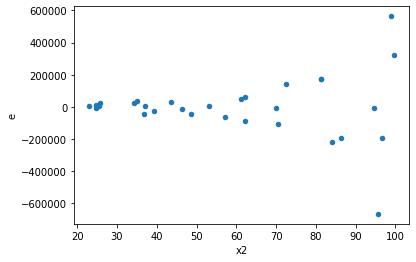

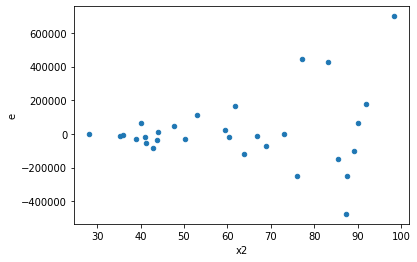

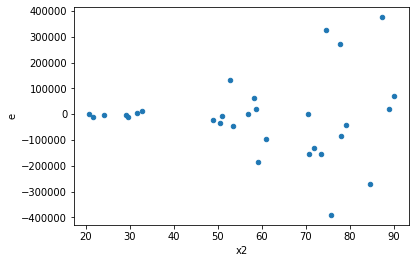

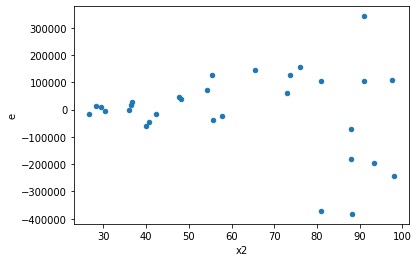

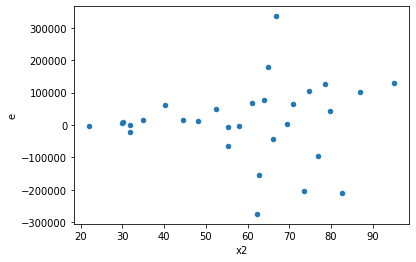

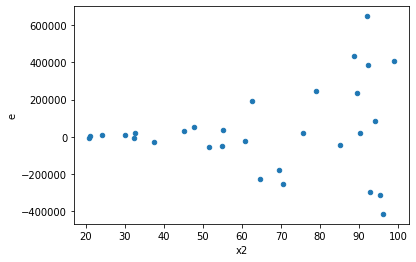

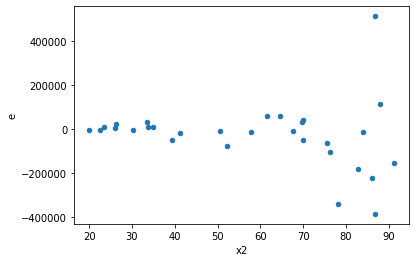

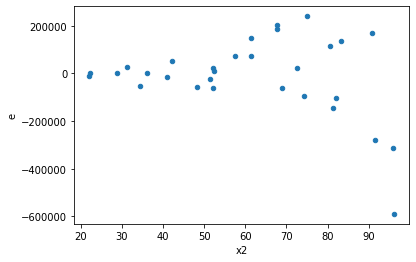

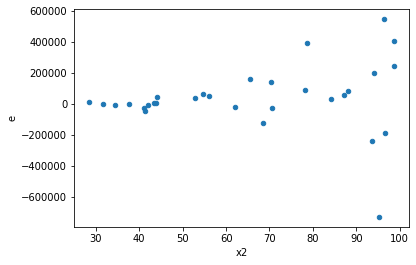

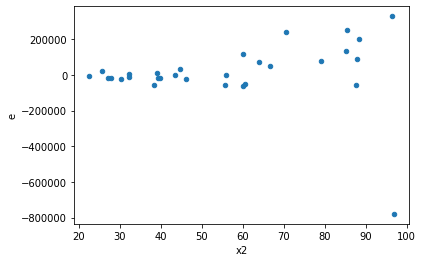

In [14]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,1068969071047.7078,3431224459.6433816,133621133880.96347,428903057.4554227,311.5415746245902,7.780014410485592e-10,0.9999999996109993,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,810777627513.1998,12537365789.412937,101347203439.14998,1567170723.6766171,64.66889784757285,8.411699476962298e-07,0.9999995794150262,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,498139801759.6523,16470784621.58965,62267475219.956535,2058848077.6987062,30.243841638648977,2.2663198238070947e-05,0.999988668400881,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,453986372747.12164,10198873902.412998,56748296593.390205,1274859237.8016248,44.513382270537825,4.294093881362926e-06,0.9999978529530593,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,123510735730.0079,6171098575.167718,15438841966.250988,771387321.8959647,20.014383861410142,0.00012896362456649157,0.9999355181877168,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,1115138351601.9048,8810390933.277527,139392293950.2381,1101298866.6596909,126.57081394537683,4.329034530847764e-08,0.9999999783548273,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,452093715973.13684,3756405346.4127083,56511714496.642105,469550668.30158854,120.35275064361124,5.414347947763076e-08,0.9999999729282603,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,392078928916.8721,9740142969.08816,49009866114.60901,1217517871.13602,40.253919286523285,6.637938471110161e-06,0.9999966810307644,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,1185615050937.583,6015101597.320211,148201881367.19788,751887699.6650264,197.1064048969325,6.021664500366342e-09,0.9999999969891677,Reject001=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,1068969071047.7078,3431224459.6433816,133621133880.96347,428903057.4554227,311.5415746245902,7.780014410485592e-10,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,810777627513.1998,12537365789.412937,101347203439.14998,1567170723.6766171,64.66889784757285,8.411699476962298e-07,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,498139801759.6523,16470784621.58965,62267475219.956535,2058848077.6987062,30.243841638648977,2.2663198238070947e-05,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,453986372747.12164,10198873902.412998,56748296593.390205,1274859237.8016248,44.513382270537825,4.294093881362926e-06,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,123510735730.0079,6171098575.167718,15438841966.250988,771387321.8959647,20.014383861410142,0.00012896362456649157,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,1115138351601.9048,8810390933.277527,139392293950.2381,1101298866.6596909,126.57081394537683,4.329034530847764e-08,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,452093715973.13684,3756405346.4127083,56511714496.642105,469550668.30158854,120.35275064361124,5.414347947763076e-08,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,392078928916.8721,9740142969.08816,49009866114.60901,1217517871.13602,40.253919286523285,6.637938471110161e-06,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,1185615050937.583,6015101597.320211,148201881367.19788,751887699.6650264,197.1064048969325,6.021664500366342e-09,Reject001=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    985
Reject001=1 : Homoscedasticity       15
Name: Result_test, dtype: int64